In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn



In [54]:
data = pd.read_csv('media.xlsx - KAG_conversion_data.csv')

In [55]:
date = data['Start Date']

In [56]:
data.isna().sum()
    

Start Date             0
ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [57]:
date.value_counts()

Mon, 21 Dec 2020    15
Mon, 10 Feb 2020    13
Sun, 21 Jun 2020    13
Fri, 27 Mar 2020    12
Wed, 01 Apr 2020    11
                    ..
Mon, 30 Nov 2020     1
Fri, 24 Jan 2020     1
Sat, 27 Jun 2020     1
Wed, 10 Jun 2020     1
Thu, 06 Aug 2020     1
Name: Start Date, Length: 309, dtype: int64

In [58]:
spent=pd.DataFrame()
spent['id'] = data['ad_id']
spent['xyz_id'] = data['xyz_campaign_id']
spent['fb_id'] = data['fb_campaign_id']
spent['clicks'] = data['Clicks']
spent['spent'] = data['Spent']
print(spent)
index = spent.iloc[:,:].index[spent.iloc[:,:].spent==spent.spent.max()]
print('id\t',spent[:].id[index],'xyz_id:\t',spent.xyz_id[index],'fb id:\t',spent.fb_id[index],'spent\t',spent.spent[index])


                id       xyz_id        fb_id      clicks       spent
0     7.087460e+05   916.000000  103916.0000    1.000000    1.430000
1     7.087490e+05   916.000000  103917.0000    2.000000    1.820000
2     7.087710e+05   916.000000  103920.0000    0.000000    0.000000
3     7.088150e+05   916.000000  103928.0000    1.000000    1.250000
4     7.088180e+05   916.000000  103928.0000    1.000000    1.290000
...            ...          ...          ...         ...         ...
1139  1.314411e+06  1178.000000  179978.0000  120.000000  173.880003
1140  1.314412e+06  1178.000000  179979.0000   28.000000   40.289999
1141  1.314414e+06  1178.000000  179981.0000  135.000000  198.710000
1142  1.314415e+06  1178.000000  179982.0000  114.000000  165.609999
1143  9.872611e+05  1067.382327  133783.9895   33.390201   51.360656

[1144 rows x 5 columns]
id	 525    1121100.0
Name: id, dtype: float64 xyz_id:	 525    1178.0
Name: xyz_id, dtype: float64 fb id:	 525    144532.0
Name: fb_id, dtype: float

In [59]:
data.corr()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,1.000000,0.929892,0.972002,0.456483,0.462308,0.431981,0.433053,0.346539,0.271331
xyz_campaign_id,0.929892,1.000000,0.872392,0.272282,0.495273,0.469729,0.476689,0.346684,0.284968
fb_campaign_id,0.972002,0.872392,1.000000,0.595753,0.439439,0.406978,0.403532,0.344170,0.257658
interest,0.456483,0.272282,0.595753,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353
Impressions,0.462308,0.495273,0.439439,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249
Clicks,0.431981,0.469729,0.406978,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526
Spent,0.433053,0.476689,0.403532,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178
Total_Conversion,0.346539,0.346684,0.344170,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034
Approved_Conversion,0.271331,0.284968,0.257658,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000


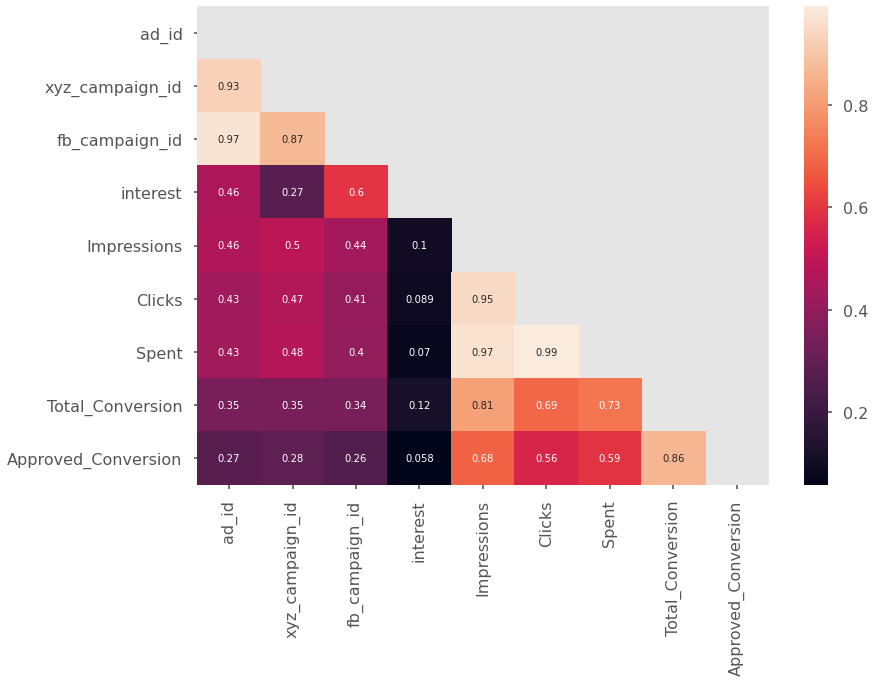

In [60]:
import seaborn as sn

correlation_matrix=np.triu(data.corr())
sn.heatmap(data.corr(),annot = True, mask = correlation_matrix)

In [61]:
print(data['xyz_campaign_id'].value_counts())
data.groupby(['xyz_campaign_id'])['Spent'].sum()

1178.000000    625
936.000000     464
916.000000      54
1067.382327      1
Name: xyz_campaign_id, dtype: int64


xyz_campaign_id
916.000000       149.710001
936.000000      2893.369999
1067.382327       51.360656
1178.000000    55662.149959
Name: Spent, dtype: float64

In [62]:
print(data['fb_campaign_id'].value_counts().head())
df = data.groupby(['fb_campaign_id','xyz_campaign_id'])['Spent'].sum()
df=df.sort_values(ascending=False)
print(df.head())


144674.0    6
144599.0    6
144636.0    6
144611.0    6
144562.0    6
Name: fb_campaign_id, dtype: int64
fb_campaign_id  xyz_campaign_id
144624.0        1178.0             1425.450004
144674.0        1178.0             1350.059995
144734.0        1178.0             1331.920000
144724.0        1178.0             1229.860004
144722.0        1178.0             1037.810004
Name: Spent, dtype: float64


In [78]:
df2=data.groupby(['ad_id'])['Spent'].sum()
df2=df2.sort_values(ascending=False)
df4 = data.groupby(['ad_id','xyz_campaign_id'])['Total_Conversion','Approved_Conversion'].sum()
df4 = df4.sort_values(by='Total_Conversion',ascending=False)
print(df2.head(),'\n\n')
print(df4.head())

ad_id
1121100.0    639.949998
1121814.0    612.300003
1121601.0    603.380002
1122265.0    541.700002
1122193.0    465.079998
Name: Spent, dtype: float64 


                           Total_Conversion  Approved_Conversion
ad_id     xyz_campaign_id                                       
1121100.0 1178.0                       60.0                 17.0
1121104.0 1178.0                       40.0                 21.0
1121814.0 1178.0                       38.0                 13.0
1314387.0 1178.0                       31.0                  9.0
1121196.0 1178.0                       31.0                  7.0


<ipython-input-78-de67f4ddbe43>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df4 = data.groupby(['ad_id','xyz_campaign_id'])['Total_Conversion','Approved_Conversion'].sum()


In [79]:
df3=pd.DataFrame()
df3['start_date'] = data['Start Date']
df3['t_c'] = data['Total_Conversion']
df3['a_c'] = data['Approved_Conversion']
df3['spent'] = data['Spent']
print(df3.sort_values(by='a_c',ascending=False).head(20),'\n\n')
print(df3.sort_values(by='t_c',ascending=False).head(20))

     start_date   t_c   a_c       spent
528  2020-01-25  40.0  21.0  360.150002
525  2020-03-01  60.0  17.0  639.949998
531  2020-01-25  26.0  14.0  163.899997
518  2020-08-26  28.0  14.0  254.049996
860  2020-09-26  38.0  13.0  612.300003
579  2020-04-01  22.0  12.0   35.310000
867  2020-07-06  23.0  10.0  429.479998
524  2020-03-01  24.0  10.0  236.769999
1127 2020-12-06  30.0  10.0  301.049999
807  2020-01-03  17.0  10.0  422.840004
544  2020-09-05  20.0   9.0  257.709999
1101 2020-11-13  23.0   9.0  163.800000
1116 2020-09-14  31.0   9.0  223.189995
577  2020-04-01  22.0   8.0  219.770002
613  2020-09-24  22.0   8.0  245.600000
1032 2020-10-20  16.0   8.0  369.069997
806  2020-01-03  17.0   8.0  277.579999
662  2020-03-23  11.0   8.0  420.579998
561  2020-06-15  23.0   7.0  260.380001
765  2020-01-20  16.0   7.0  603.380002 


     start_date   t_c   a_c       spent
525  2020-03-01  60.0  17.0  639.949998
528  2020-01-25  40.0  21.0  360.150002
860  2020-09-26  38.0  13.0  612.3000

In [80]:
import datetime

x = datetime.datetime.strptime(date[0], "%a, %d %b %Y").strftime("%d/%m/%Y")
print(x)


11/04/2020


In [81]:
data['Start Date'] = pd.to_datetime(data['Start Date'],errors='coerce')
df6 = data.groupby(data['Start Date'].dt.strftime('%B'))['Total_Conversion'].sum()
df7 = data.groupby(data['Start Date'].dt.strftime('%B'))['Approved_Conversion'].sum()
print(df6.sort_values())
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df6=df6.reindex(months,axis=0)
df7 = df7.reindex(months,axis=0)
print(df6)

Start Date
October      175.0
June         205.0
April        213.0
February     213.0
August       240.0
May          246.0
November     250.0
July         298.0
December     304.0
March        360.0
September    365.0
January      395.0
Name: Total_Conversion, dtype: float64
Start Date
January      395.0
February     213.0
March        360.0
April        213.0
May          246.0
June         205.0
July         298.0
August       240.0
September    365.0
October      175.0
November     250.0
December     304.0
Name: Total_Conversion, dtype: float64


In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')


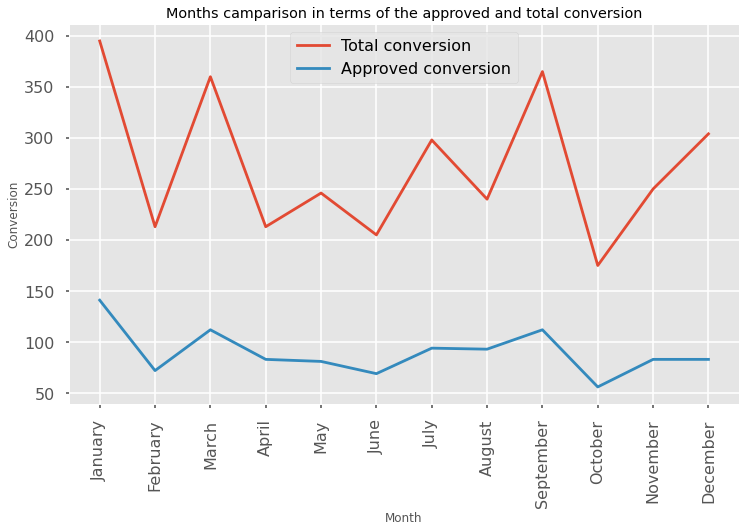

In [83]:
plt.figure(figsize=(12,7))
plt.plot(df6,label='Total conversion')
plt.xticks(range(len(df6)), months, rotation='vertical')
plt.title('Month camparison in terms of the total conversion')
plt.plot(df7, label = 'Approved conversion')
plt.xticks(range(len(df7)), months, rotation='vertical')
plt.title('Months camparison in terms of the approved and total conversion')
plt.xlabel("Month")
plt.ylabel("Conversion")
plt.legend()
plt.show()


In [113]:
data['Start Date'] = pd.to_datetime(data['Start Date'],errors='coerce')
df = data.groupby(data['Start Date'].dt.strftime('%A'))['Total_Conversion'].sum()
df2 = data.groupby(data['Start Date'].dt.strftime('%A'))['Approved_Conversion'].sum()
print(df.sort_values())
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 
          "Sunday"]
df=df.reindex(days,axis=0)
df2 = df2.reindex(days,axis=0)
print('\n\n',df)

Start Date
Thursday     321.0
Tuesday      339.0
Wednesday    346.0
Saturday     522.0
Friday       559.0
Monday       569.0
Sunday       608.0
Name: Total_Conversion, dtype: float64


 Start Date
Monday       569.0
Tuesday      339.0
Wednesday    346.0
Thursday     321.0
Friday       559.0
Saturday     522.0
Sunday       608.0
Name: Total_Conversion, dtype: float64


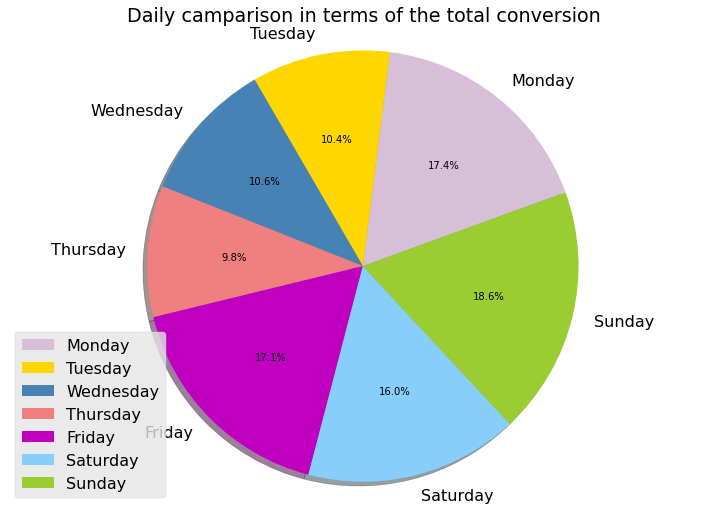

In [116]:
style.use('seaborn-poster')
colors = ['thistle', 'gold', 'steelblue', 'lightcoral','m','lightskyblue','yellowgreen']
explode=np.zeros(len(days))
pie=plt.pie(df, labels = days,autopct="%.1f%%",startangle=20,shadow=True,colors=colors)
plt.axis("equal")
plt.title('Daily camparison in terms of the total conversion')
plt.legend(pie[0],days, loc='lower left'),
plt.show()

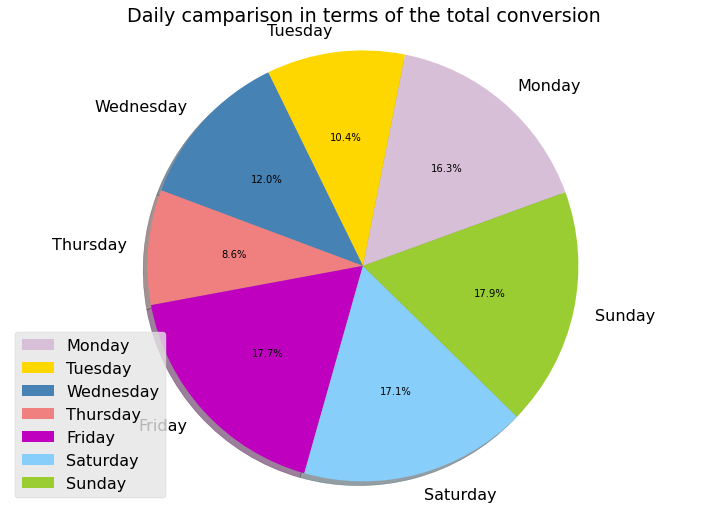

In [115]:
style.use('seaborn-poster')
colors = ['thistle', 'gold', 'steelblue', 'lightcoral','m','lightskyblue','yellowgreen']
explode=np.zeros(len(days))
pie=plt.pie(df2, labels = days,autopct="%.1f%%",startangle=20,shadow=True,colors=colors)
plt.axis("equal")
plt.title('Daily camparison in terms of the total conversion')
plt.legend(pie[0],days, loc='lower left'),
plt.show()

In [111]:
df = data.groupby(data['Start Date'].dt.strftime('%d'))['Total_Conversion'].sum()
print(df.sort_values(ascending=False))
df2 = data.groupby(data['Start Date'].dt.strftime('%d'))['Approved_Conversion'].sum()



Start Date
26    254.0
01    215.0
20    165.0
13    156.0
14    140.0
21    138.0
25    137.0
06    131.0
02    129.0
27    121.0
15    117.0
10    112.0
18    110.0
07    106.0
12    105.0
28     97.0
03     95.0
19     94.0
16     94.0
05     85.0
17     84.0
24     81.0
11     80.0
09     75.0
22     72.0
04     70.0
23     66.0
29     65.0
08     46.0
30     24.0
Name: Total_Conversion, dtype: float64


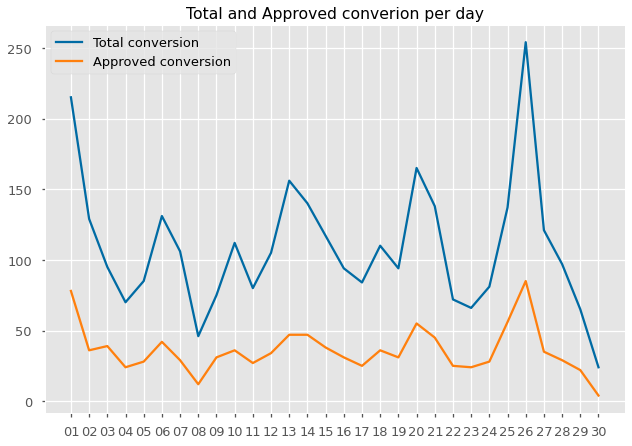

In [104]:
style.use('seaborn-talk')
plt.title('Total and Approved converion per day')
plt.plot(df,label='Total conversion')
plt.plot(df2,label='Approved conversion')
plt.legend()
plt.show()

In [124]:
df = data.groupby(data['Start Date'].dt.strftime('%d'))['Impressions'].sum()
print(df.sort_values(ascending=False))


Start Date
26    17019159.0
20    13872191.0
21    13419547.0
01    10844911.0
14    10446458.0
10     9498356.0
27     9411044.0
15     8528758.0
25     8025123.0
02     7944494.0
06     7928367.0
03     7345203.0
07     6987361.0
13     6876098.0
12     6715751.0
18     6636123.0
17     6433282.0
23     6404665.0
19     6046813.0
24     5646360.0
05     5523660.0
22     5282173.0
16     4724975.0
11     4171667.0
29     3773507.0
28     3572358.0
09     3471778.0
04     3398589.0
08     2166528.0
30     1319529.0
Name: Impressions, dtype: float64


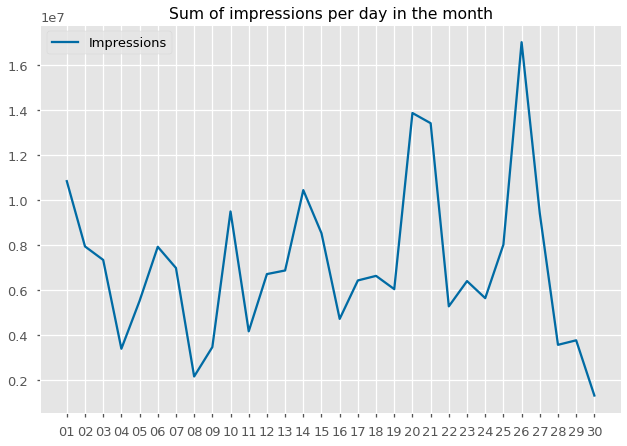

In [131]:
style.use('seaborn-talk')
plt.title('Sum of impressions per day in the month')
plt.plot(df,label='Impressions')
plt.legend()
plt.show()

In [121]:
df = data.groupby(data['Start Date'].dt.strftime('%A'))['Impressions'].sum()
print(df.sort_values())
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 
          "Sunday"]
print('\n\n',df)

Start Date
Wednesday    16295637.0
Thursday     16749182.0
Tuesday      22265564.0
Saturday     31340328.0
Friday       38112408.0
Sunday       42816446.0
Monday       45855263.0
Name: Impressions, dtype: float64


 Start Date
Friday       38112408.0
Monday       45855263.0
Saturday     31340328.0
Sunday       42816446.0
Thursday     16749182.0
Tuesday      22265564.0
Wednesday    16295637.0
Name: Impressions, dtype: float64


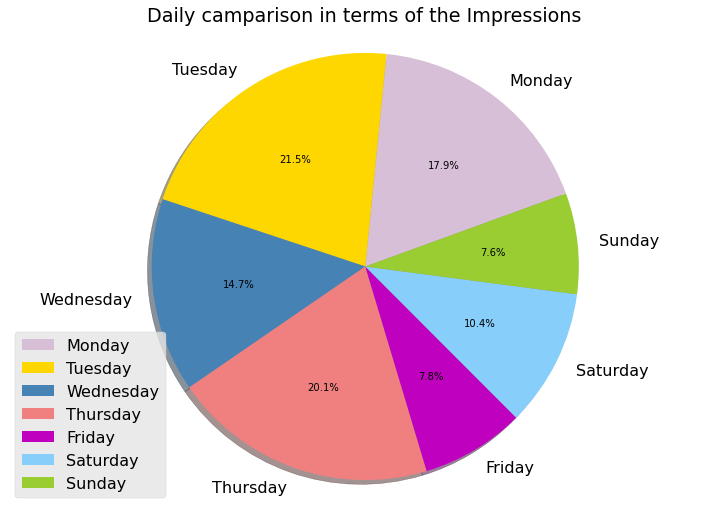

In [123]:
style.use('seaborn-poster')
colors = ['thistle', 'gold', 'steelblue', 'lightcoral','m','lightskyblue','yellowgreen']
explode=np.zeros(len(days))
pie=plt.pie(df, labels = days,autopct="%.1f%%",startangle=20,shadow=True,colors=colors)
plt.axis("equal")
plt.title('Daily camparison in terms of the Impressions')
plt.legend(pie[0],days, loc='lower left'),
plt.show()

interest
28.0    10959830.0
27.0    16352527.0
10.0    17989844.0
29.0    18768653.0
16.0    31809524.0
Name: Impressions, dtype: float64


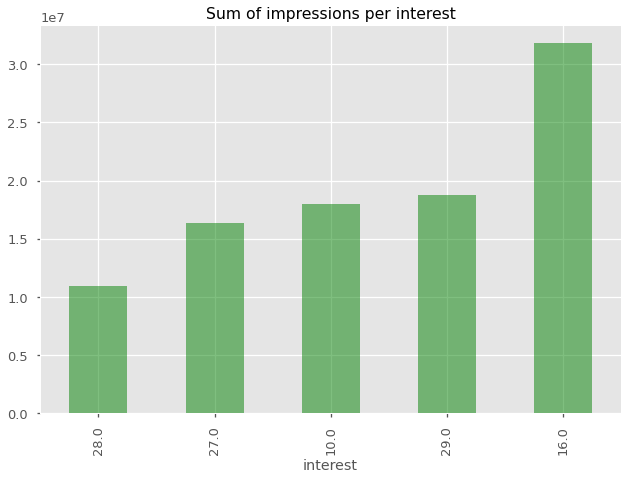

In [200]:
df = data.groupby(data['interest'])['Impressions'].sum()
df = df.sort_values().tail()
print(df)

style.use('seaborn-talk')
df.plot(kind='bar',title='Sum of impressions per interest',color='g',alpha=0.5)

interest
27.0     54.0
15.0     63.0
10.0     91.0
29.0    132.0
16.0    141.0
Name: Approved_Conversion, dtype: float64


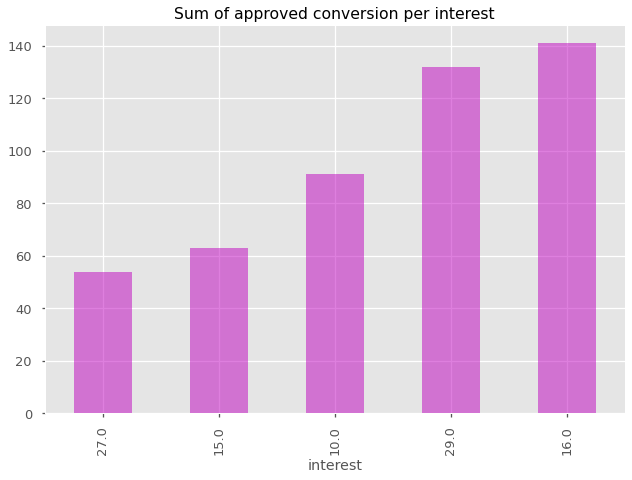

In [199]:
df2 = data.groupby(data['interest'])['Approved_Conversion'].sum()
df2= df2.sort_values().tail()
print(df2)
df2.plot(kind='bar',title='Sum of approved conversion per interest',alpha = 0.5,color='m')

interest
28.0    2025.0
29.0    3315.0
10.0    3317.0
27.0    3409.0
16.0    5144.0
Name: Clicks, dtype: float64


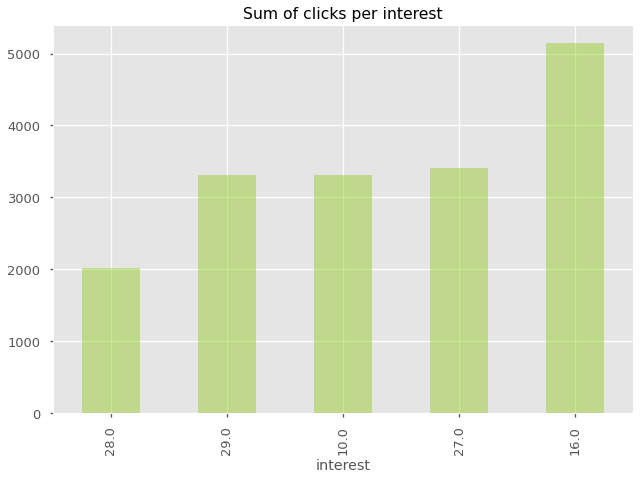

In [201]:
df3 = data.groupby(data['interest'])['Clicks'].sum()
df3 = df3.sort_values().tail()
print(df3)
df3.plot(kind='bar',title='Sum of clicks per interest',alpha = 0.5,color='yellowgreen')

In [189]:
s = pd.Series(pd.date_range('2012-01-03',periods=3, freq='D'))
td = pd.Series([pd.Timedelta(days=i) for i in range(3)])
df = pd.DataFrame({'A': s, 'B': td})
df

,A,B
0,2012-01-03,0 days
1,2012-01-04,1 days
2,2012-01-05,2 days


In [395]:
df['C'] = df.A+df.B
df

,A,B,C
0,2012-01-03,0 days,2012-01-03
1,2012-01-04,1 days,2012-01-05
2,2012-01-05,2 days,2012-01-07


In [397]:
df.dtypes

A     datetime64[ns]
B    timedelta64[ns]
C     datetime64[ns]
dtype: object

In [399]:
s - s.max()

0   -2 days
1   -1 days
2    0 days
dtype: timedelta64[ns]

In [403]:
s - datetime.datetime(2011,1,1,3,5)

0   366 days 20:55:00
1   367 days 20:55:00
2   368 days 20:55:00
dtype: timedelta64[ns]

In [404]:
s + datetime.timedelta(minutes=5)

0   2012-01-03 00:05:00
1   2012-01-04 00:05:00
2   2012-01-05 00:05:00
dtype: datetime64[ns]

In [405]:
s + pd.offsets.Minute(5)+pd.offsets.Milli(5)

0   2012-01-03 00:05:00.005
1   2012-01-04 00:05:00.005
2   2012-01-05 00:05:00.005
dtype: datetime64[ns]